In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('sgemm_product.csv')

In [23]:
data = data.head(5000)

In [24]:
len(data)

5000

In [25]:
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4

In [26]:
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

In [27]:
data.head()

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Mean_Runtime  
0   0      116.3700  
1   1       78.7050  
2   0       80.5650  
3   1       86.6375  
4   0      118.6625

In [28]:
type(data.iloc[:,-1])

pandas.core.series.Series

In [29]:
x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

In [30]:
print(x.shape)

print(type(x))

print(y.shape)

print(type(y))

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
(5000,)
<class 'pandas.core.series.Series'>


In [31]:
median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0

In [32]:
data.head()

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Mean_Runtime  Mean_Runtime_C  
0   0      116.3700             1.0  
1   1       78.7050             1.0  
2   0       80.5650             1.0  
3   1       86.6375             1.0  
4   0      118.6625             1.0

In [33]:
data = data.drop(['Mean_Runtime'], axis = 1)

In [34]:
data.head()

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Mean_Runtime_C  
0   0             1.0  
1   1             1.0  
2   0             1.0  
3   1             1.0  
4   0             1.0

In [35]:
x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

In [16]:
x.head()

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  
0   0  
1   1  
2   0  
3   1  
4   0

In [17]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Mean_Runtime_C, dtype: float64

In [18]:
y.unique()

array([1., 0.])

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [21]:
print(x.mean(axis = 0))

[ 0.00000000e+00 -4.54747351e-17  2.72848411e-16  2.72848411e-16
  4.54747351e-17  1.59161573e-16 -2.27373675e-17  5.68434189e-17
  9.09494702e-17  2.27373675e-17  7.28306304e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [22]:
print(x.std(axis = 0))

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# SGEMM GPU kernel performance dataset

### Support Vector Machines (SVM)

In [23]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import time

from sklearn import svm

In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

tr_accuracy = []

te_accuracy = []

running_time = []

for i in kernels:
    
    svm_classifier = svm.SVC(kernel = i)
    
    start = time.time()
    
    svm_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = svm_classifier.predict(x_train)
    
    y_pred_te = svm_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))
    
    
   

C:\Users\megha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\megha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\megha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
print(tr_accuracy)

print(te_accuracy)

[0.8702857142857143, 0.9562857142857143, 0.9748571428571429, 0.7931428571428571]
[0.8413333333333334, 0.94, 0.9586666666666667, 0.7933333333333333]


In [28]:
def plot_accuracies(kernel, training_accuracy, testing_accuracy, title, xlab, ylab):
    
    plt.plot(kernels,tr_accuracy,marker='o',markersize=6,color='blue',label='train')
    
    plt.plot(kernels,te_accuracy,marker='s',markersize=6,color='red',label='test')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.legend()
    
    plt.grid()
    
    plt.show()

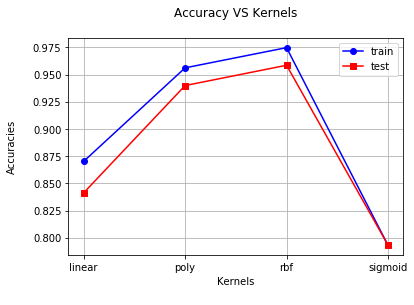

In [29]:
plot_accuracies(kernels, tr_accuracy, te_accuracy, 'Accuracy VS Kernels\n', 'Kernels\n','Accuracies\n',)

In [30]:
def plot_running_time(kernels, running_time, title, xlab, ylab):
    
    plt.plot(kernels, running_time, marker='o', markersize=8,color='blue')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.grid()
    
    plt.show()

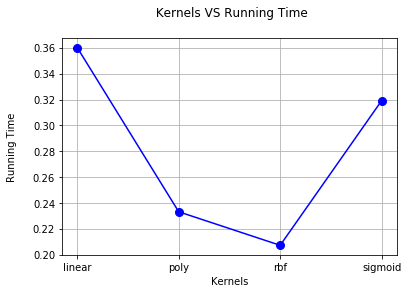

In [31]:
plot_running_time(kernels, running_time, ' Kernels VS Running Time\n', 'Kernels\n', 'Running Time\n')

In [32]:
running_time

[0.36003684997558594,
 0.23333144187927246,
 0.2074425220489502,
 0.3191044330596924]

In [33]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

cv_scores = []

running_time = []

for i in kernels:
    
    start = time.time()
    
    svm_classifier = svm.SVC(kernel = i)
    
    score = cross_val_score(svm_classifier, x_train, y_train, cv = 5)
    
    running_time.append(time.time() - start)
    
    cv_scores.append(score.mean())

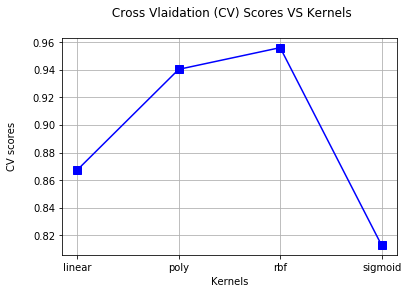

In [34]:
plt.plot(kernels, cv_scores, marker='s', markersize=8,color='blue')

plt.show

plt.title(' Cross Vlaidation (CV) Scores VS Kernels\n')
    
plt.xlabel('Kernels\n')
    
plt.ylabel('CV scores\n')
    
plt.grid()

plt.show()

In [35]:
tr_g_accuracy = []

te_g_accuracy = []

running_g_time = []

gamma_values = ['auto', 1, 10, 100]

for i in gamma_values:
    
    start_g = time.time()
    
    svm_classifier = svm.SVC(kernel = 'rbf', gamma = i )
    
    svm_classifier.fit(x_train, y_train)
    
    running_g_time.append(time.time() - start_g)
    
    y_pred_tr_g = svm_classifier.predict(x_train)
    
    y_pred_te_g = svm_classifier.predict(x_test)
        
    tr_g_accuracy.append(accuracy_score(y_train,y_pred_tr_g))
        
    te_g_accuracy.append(accuracy_score(y_test,y_pred_te_g))

In [36]:
print(tr_g_accuracy)
print(te_g_accuracy)

[0.9748571428571429, 1.0, 1.0, 1.0]
[0.9586666666666667, 0.8693333333333333, 0.49266666666666664, 0.49266666666666664]


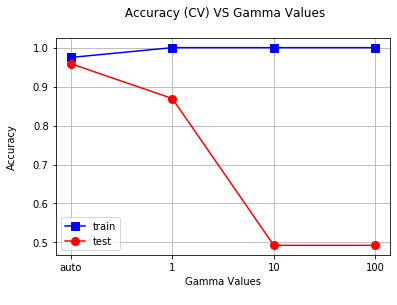

In [37]:
plt.plot(gamma_values, tr_g_accuracy, marker='s', markersize=8,color='blue', label = 'train')

plt.plot(gamma_values, te_g_accuracy, marker='o', markersize=8,color='red', label = 'test')

plt.title(' Accuracy (CV) VS Gamma Values\n')
    
plt.xlabel('Gamma Values\n')
    
plt.ylabel('Accuracy\n')
    
plt.grid()

plt.legend()

plt.show()



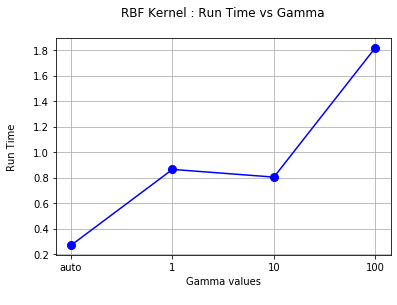

In [38]:
plot_running_time(gamma_values, running_g_time, 'RBF Kernel : Run Time vs Gamma\n', 'Gamma values\n', 'Run Time\n')

In [39]:
tr_c_accuracy = []

te_c_accuracy = []

running_c_time = []

c_values = list(np.arange(1,100,2))

for i in c_values:
    
    start_c = time.time()
    
    svm_classifier = svm.SVC(C = i, kernel = 'rbf', gamma = 'auto' )
    
    svm_classifier.fit(x_train, y_train)
    
    running_c_time.append(time.time() - start_c)
    
    y_pred_tr_c = svm_classifier.predict(x_train)
    
    y_pred_te_c = svm_classifier.predict(x_test)
        
    tr_c_accuracy.append(accuracy_score(y_train,y_pred_tr_c))
        
    te_c_accuracy.append(accuracy_score(y_test,y_pred_te_c))

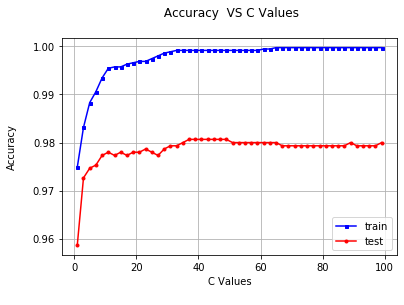

In [41]:
plt.plot(c_values, tr_c_accuracy, marker='s', markersize=3,color='blue', label = 'train')

plt.plot(c_values, te_c_accuracy,  marker='o', markersize=3,color='red', label = 'test')

plt.title(' Accuracy  VS C Values\n')
    
plt.xlabel('C Values\n')
    
plt.ylabel('Accuracy\n')
    
plt.grid()

plt.legend()

plt.show()

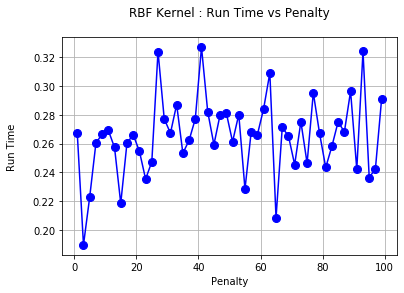

In [42]:
plot_running_time(c_values, running_c_time, 'RBF Kernel : Run Time vs Penalty\n', 'Penalty', 'Run Time\n')

In [43]:
final_svm_model = svm.SVC(C = 42, kernel = 'rbf', gamma = 'auto' )

In [44]:
scores = cross_val_score(final_svm_model, x, y, cv=10, scoring='accuracy')
print(scores.mean())

0.889


In [45]:
final_svm_model.fit(x_train, y_train)

SVC(C=42, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred_f = final_svm_model.predict(x_test)

In [47]:
print(accuracy_score(y_test, y_pred_f ))

0.9806666666666667


In [48]:
print(confusion_matrix(y_test, y_pred_f))

[[726  13]
 [ 16 745]]


In [49]:
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       739
         1.0       0.98      0.98      0.98       761

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



### Decision Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier 

In [77]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
dt_y_pred = dt.predict(x_test)

In [79]:
print(accuracy_score(y_test, dt_y_pred ))

0.9813333333333333


In [80]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       739
         1.0       0.98      0.98      0.98       761

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [81]:
print(confusion_matrix(y_test, dt_y_pred))

[[725  14]
 [ 14 747]]


In [82]:
scores = cross_val_score(dt, x_train, y_train,  cv=10)

In [83]:
print(scores.mean())

0.9811428291542905


In [84]:
tr_d_accuracy = []

te_d_accuracy = []

running_d_time = []

maximum_depth = [2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40]

for i in maximum_depth:
    
    start_d = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = i)
    
    dt_classifier.fit(x_train, y_train)
    
    running_d_time.append(time.time() - start_d)
    
    y_pred_tr_d = dt_classifier.predict(x_train)
    
    y_pred_te_d = dt_classifier.predict(x_test)
        
    tr_d_accuracy.append(accuracy_score(y_train,y_pred_tr_d))
        
    te_d_accuracy.append(accuracy_score(y_test,y_pred_te_d))

In [85]:
def plot_accuracies_dt(inputs, training_accuracy, testing_accuracy, title, xlab, ylab):
    
    plt.plot(inputs,training_accuracy,marker='o',markersize=6,color='blue',label='train')
    
    plt.plot(inputs,testing_accuracy,marker='s',markersize=6,color='red',label='test')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.legend()
    
    plt.grid()
    
    plt.show()

In [86]:
def plot_running_time_dt(inputs, running_time, title, xlab, ylab):
    
    plt.plot(inputs, running_time, marker='o', markersize=8,color='blue')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.grid()
    
    plt.show()

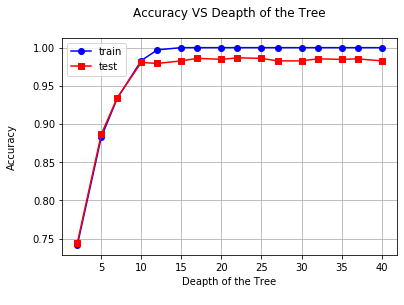

In [87]:
plot_accuracies_dt(maximum_depth, tr_d_accuracy, te_d_accuracy, 'Accuracy VS Deapth of the Tree\n', 'Deapth of the Tree\n', 'Accuracy\n' )

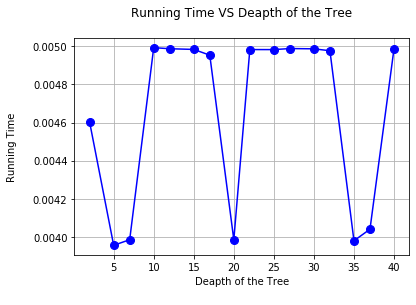

In [88]:
plot_running_time_dt(maximum_depth, running_d_time, 'Running Time VS Deapth of the Tree\n', 'Deapth of the Tree\n', 'Running Time\n')

In [89]:
targ_names = ['Yes','No']

In [90]:
import graphviz
from sklearn.tree import export_graphviz


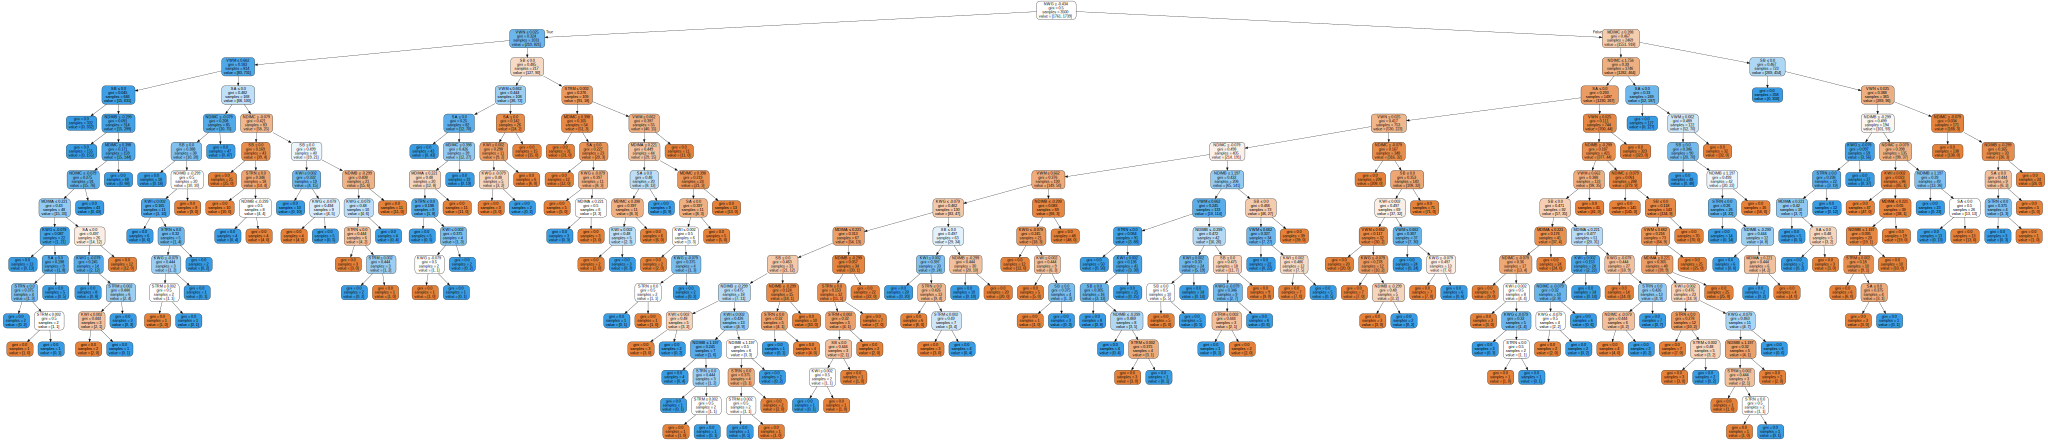

In [91]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM',
                                        'STRN', 'SA', 'SB'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [92]:
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Mean_Runtime_C'],
      dtype='object')

In [93]:
tr_msl_accuracy = []

te_msl_accuracy = []

running_msl_time = []

minimum_samples_leaf = [1,2,3,4,5,6,7,8,9,10]

for i in minimum_samples_leaf:
    
    start_msl = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = i )
    
    dt_classifier.fit(x_train, y_train)
    
    running_msl_time.append(time.time() - start_msl)
    
    y_pred_tr_msl = dt_classifier.predict(x_train)
    
    y_pred_te_msl = dt_classifier.predict(x_test)
        
    tr_msl_accuracy.append(accuracy_score(y_train,y_pred_tr_msl))
        
    te_msl_accuracy.append(accuracy_score(y_test,y_pred_te_msl))

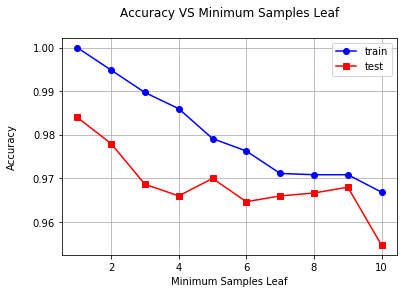

In [94]:
plot_accuracies_dt(minimum_samples_leaf,tr_msl_accuracy, te_msl_accuracy, 'Accuracy VS Minimum Samples Leaf\n', 'Minimum Samples Leaf\n',
                  'Accuracy\n')

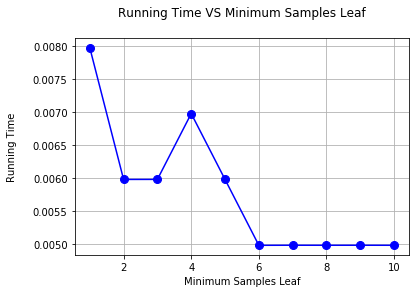

In [95]:
plot_running_time_dt(minimum_samples_leaf, running_msl_time, 'Running Time VS Minimum Samples Leaf\n', 'Minimum Samples Leaf\n', 'Running Time\n')

In [96]:
tr_mss_accuracy = []

te_mss_accuracy = []

running_mss_time = []

minimum_samples_split = [2,4,6,8,10,12,14,16,18,20]

for i in minimum_samples_split:
    
    start_mss = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = i )
    
    dt_classifier.fit(x_train, y_train)
    
    running_mss_time.append(time.time() - start_mss)
    
    y_pred_tr_mss = dt_classifier.predict(x_train)
    
    y_pred_te_mss = dt_classifier.predict(x_test)
        
    tr_mss_accuracy.append(accuracy_score(y_train,y_pred_tr_mss))
        
    te_mss_accuracy.append(accuracy_score(y_test,y_pred_te_mss))

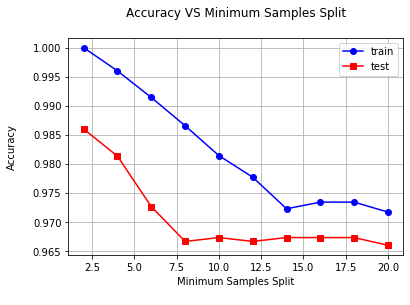

In [97]:
plot_accuracies_dt(minimum_samples_split,tr_mss_accuracy, te_mss_accuracy, 'Accuracy VS Minimum Samples Split\n', 'Minimum Samples Split\n',
                  'Accuracy\n')

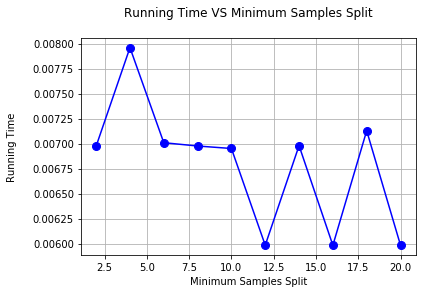

In [98]:
plot_running_time_dt(minimum_samples_split, running_mss_time, 'Running Time VS Minimum Samples Split\n', 'Minimum Samples Split\n', 'Running Time\n')

In [99]:
tr_cr_accuracy = []

te_cr_accuracy = []

running_cr_time = []

criterion_metric = ['gini','entropy']

for i in criterion_metric:
    
    start_cr = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, criterion = i )

    dt_classifier.fit(x_train, y_train)
    
    running_cr_time.append(time.time() - start_cr)
    
    y_pred_tr_cr = dt_classifier.predict(x_train)
    
    y_pred_te_cr = dt_classifier.predict(x_test)
        
    tr_cr_accuracy.append(accuracy_score(y_train,y_pred_tr_cr))
        
    te_cr_accuracy.append(accuracy_score(y_test,y_pred_te_cr))

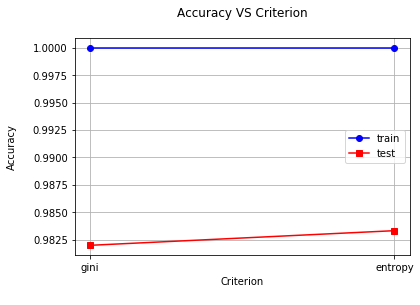

In [100]:
plot_accuracies_dt(criterion_metric,tr_cr_accuracy, te_cr_accuracy, 'Accuracy VS Criterion\n', 'Criterion\n',
                  'Accuracy\n')

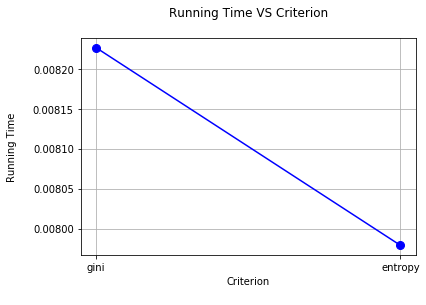

In [101]:
plot_running_time_dt(criterion_metric, running_cr_time, 'Running Time VS Criterion\n', 'Criterion\n', 'Running Time\n')

In [102]:
final_dt_classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy' )

In [103]:
final_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
dt_pred = final_dt_classifier.predict(x_test)

In [105]:
print(accuracy_score(y_test, dt_pred))

0.9853333333333333


In [106]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       739
         1.0       0.99      0.99      0.99       761

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [107]:
score = cross_val_score(final_dt_classifier, x_train, y_train, cv = 10)
    
print(score.mean())

0.9800040420155034


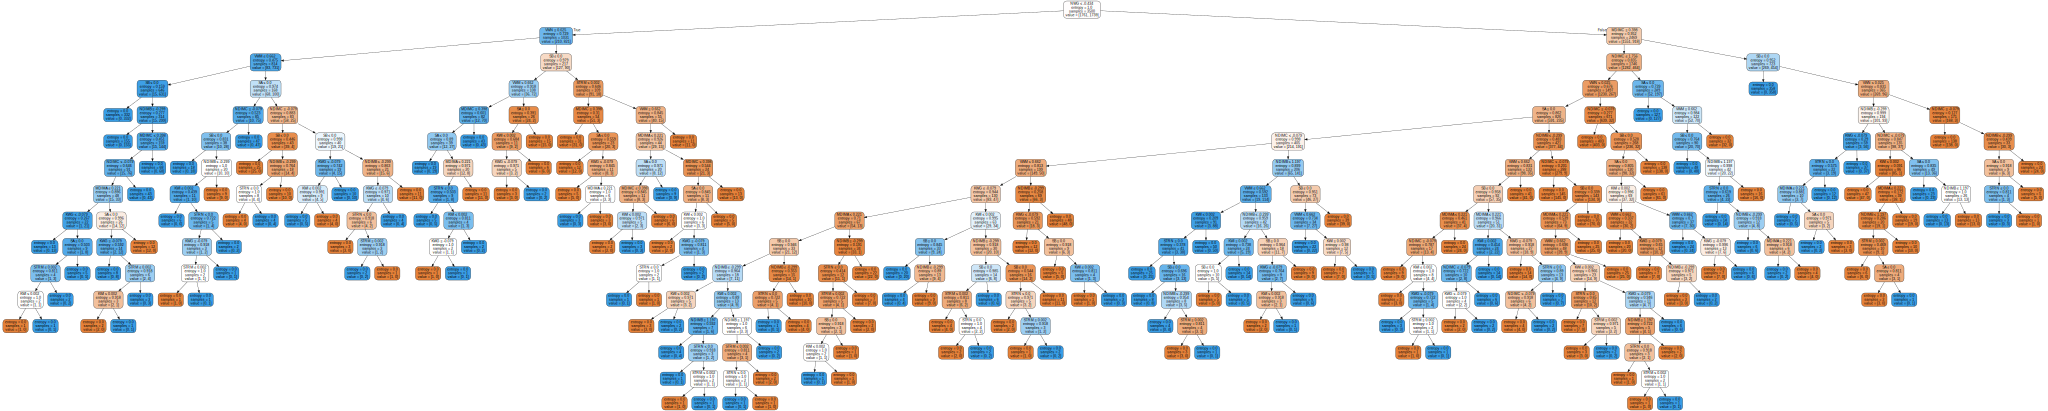

In [108]:
dot_data = export_graphviz(final_dt_classifier, out_file=None, 
                         feature_names=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM',
                                        'STRN', 'SA', 'SB'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Boosting Models

In [109]:
from xgboost import XGBClassifier

In [110]:
xgb = XGBClassifier()

In [111]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [112]:
xgb_pred = xgb.predict(x_test)

In [113]:
print(accuracy_score(y_test,xgb_pred))

0.9833333333333333


In [114]:
print(confusion_matrix(y_test,xgb_pred))

[[730   9]
 [ 16 745]]


In [115]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       739
         1.0       0.99      0.98      0.98       761

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [116]:
tr_accuracy = []

te_accuracy = []

running_time = []

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7]

for i in learning_rate:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

In [117]:
def plot_accuracies_xgb(inputs, training_accuracy, testing_accuracy, title, xlab, ylab):
    
    plt.plot(inputs,training_accuracy,marker='o',markersize=6,color='blue',label='train')
    
    plt.plot(inputs,testing_accuracy,marker='s',markersize=6,color='red',label='test')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.legend()
    
    plt.grid()
    
    plt.show()

In [118]:
def plot_running_time_xgb(inputs, running_time, title, xlab, ylab):
    
    plt.plot(inputs, running_time, marker='o', markersize=8,color='blue')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.grid()
    
    plt.show()

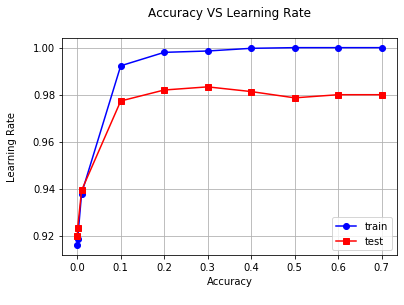

In [119]:
plot_accuracies_xgb(learning_rate, tr_accuracy, te_accuracy, 'Accuracy VS Learning Rate\n', 'Accuracy\n', 'Learning Rate\n' )

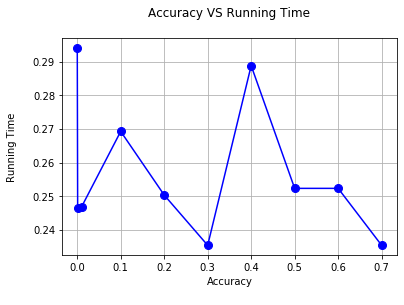

In [120]:
plot_running_time(learning_rate,running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n')

In [121]:
tr_accuracy = []

te_accuracy = []

running_time = []

number_of_estimators = [25,50,75,100,125,150,175,200]

for i in number_of_estimators:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = 0.3, n_estimators = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

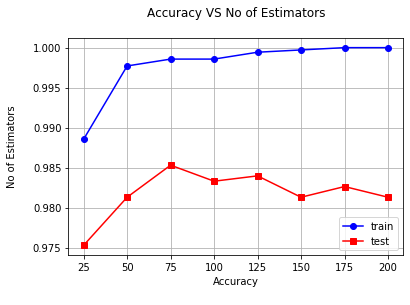

In [122]:
plot_accuracies_xgb(number_of_estimators, tr_accuracy, te_accuracy, 'Accuracy VS No of Estimators\n', 'Accuracy\n', 'No of Estimators\n' )

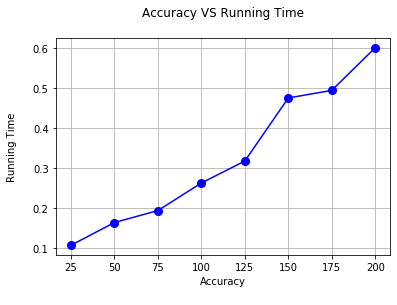

In [123]:
plot_running_time_xgb(number_of_estimators, running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n' )

In [124]:
tr_accuracy = []

te_accuracy = []

running_time = []

maximum_depth = [2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40]

for i in maximum_depth:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = 0.3, n_estimators = 75, max_depth = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

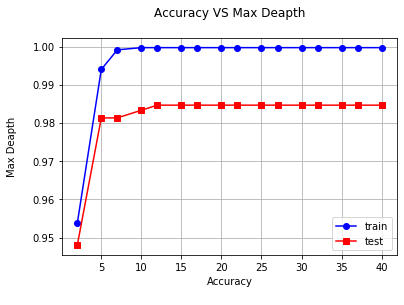

In [125]:
plot_accuracies_xgb(maximum_depth, tr_accuracy, te_accuracy, 'Accuracy VS Max Deapth\n', 'Accuracy\n', 'Max Deapth\n' )

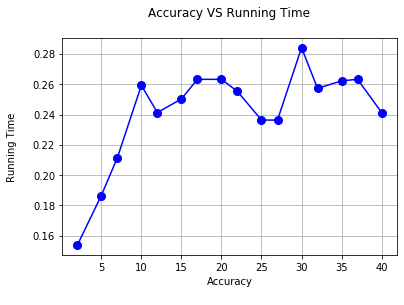

In [126]:
plot_running_time_xgb(maximum_depth, running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n' )

In [127]:
final_xgb_classifier = XGBClassifier(learning_rate = 0.3, n_estimators = 75, max_depth = 12 )

In [128]:
final_xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [129]:
xgb_pred = final_xgb_classifier.predict(x_test)

In [130]:
print(accuracy_score(y_test,xgb_pred))

0.9846666666666667


In [131]:
print(confusion_matrix(y_test,xgb_pred))

[[728  11]
 [ 12 749]]


In [132]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       739
         1.0       0.99      0.98      0.98       761

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [133]:
score = cross_val_score(final_xgb_classifier, x_train, y_train, cv = 10)

In [134]:
print(score.mean())

0.9837183463888335


# Bank Marketing Dataset

### SVM

In [135]:
bank = pd.read_csv('bank.csv', sep = ';')

In [136]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [137]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [138]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [139]:
bank.isnull().any().sum()

0

In [140]:
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(bank)
profile_report

In [141]:
numerical_features = bank.select_dtypes(include=[np.number])
categorical_features = bank.select_dtypes(include=[np.object])

In [142]:
print('Total number of numerical features =  ', len(numerical_features.columns))
print('Total number of categorical features = ', len(categorical_features.columns))

Total number of numerical features =   7
Total number of categorical features =  10


In [143]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

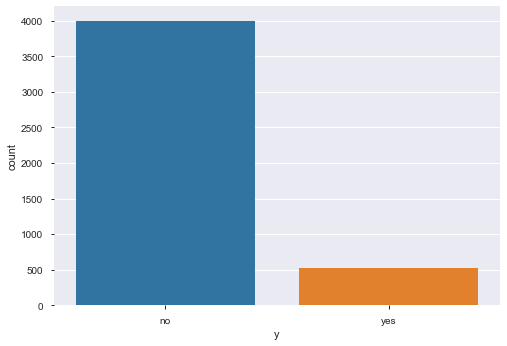

In [144]:
sns.countplot(bank['y']);

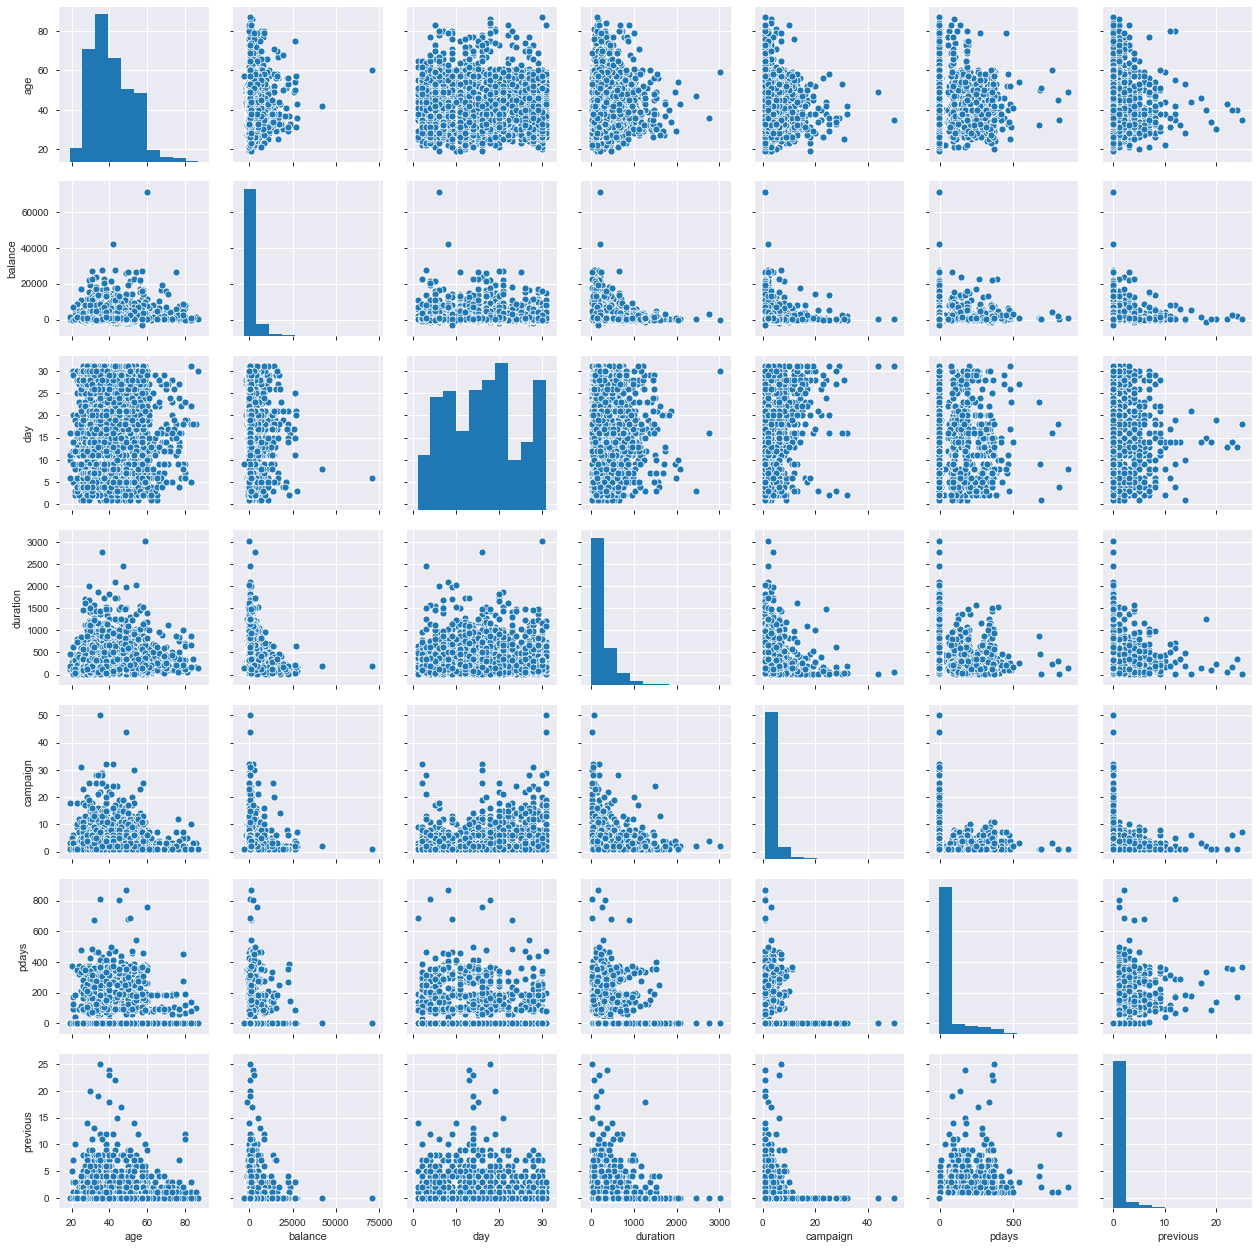

In [145]:
sns.pairplot(bank)

In [146]:
bank.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000

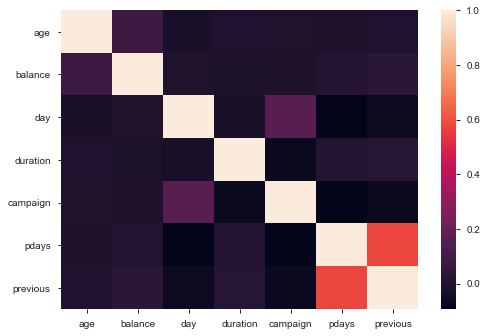

In [147]:
sns.heatmap(bank.corr())

In [148]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [149]:
bank = pd.get_dummies(bank, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'], drop_first= True)

In [150]:
bank.head()

age  balance  day  duration  campaign  pdays  previous   y  \
0   30     1787   19        79         1     -1         0  no   
1   33     4789   11       220         1    339         4  no   
2   35     1350   16       185         1    330         1  no   
3   30     1476    3       199         4     -1         0  no   
4   59        0    5       226         1     -1         0  no   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          0   
2                0                 0  ...          0          0          0   
3                0                 0  ...          0          1          0   
4                1                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          1          0               0   
1          1          0          0          0               0   
2          0          0          0          0               0   
3          0          0          0          0               0   
4          1          0          0          0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 0                 1  
4                 0                 1  

[5 rows x 43 columns]

In [151]:
bank.shape

(4521, 43)

In [152]:
bank.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [153]:
y = bank['y']

In [154]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [155]:
bank.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [156]:
x = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_self-employed', 'job_services','job_student', 'job_technician', 'job_unemployed', 'job_unknown',
        'marital_married', 'marital_single', 'education_secondary','education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
        'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug','month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
        'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep','poutcome_other', 'poutcome_success', 'poutcome_unknown']]

In [157]:
x.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [158]:
x.shape

(4521, 42)

In [159]:
y.shape

(4521,)

In [160]:
x = scaler.fit_transform(x)

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [163]:
print(x.mean(axis = 0))

[-1.17873712e-16 -1.57164949e-17  2.35747424e-18 -7.62250004e-17
 -6.28659797e-18 -3.88983250e-17  3.92912373e-18 -3.69337631e-17
  4.08628868e-17  4.40061858e-17 -1.96456187e-17 -1.57164949e-17
  1.10015465e-17 -1.41448454e-17 -5.50077323e-18  1.33590207e-17
  2.84861471e-17  1.41448454e-17  7.85824746e-17  6.28659797e-18
 -1.25731959e-17  1.21802836e-16  1.88597939e-17  2.75038661e-18
  1.43413016e-16  5.97226807e-17 -1.10015465e-17  2.67180414e-17
 -3.14329899e-18 -1.57164949e-18  2.35747424e-17  4.08628868e-17
 -6.28659797e-18 -7.85824746e-18 -9.42989696e-18 -7.70108252e-17
  3.61479383e-17  1.80739692e-17 -1.13944588e-17 -1.17873712e-17
  1.57164949e-18 -1.04121779e-16]


In [169]:
print(x.std(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [170]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

tr_accuracy = []

te_accuracy = []

running_time = []

for i in kernels:
    
    svm_classifier = svm.SVC(kernel = i)
    
    start = time.time()
    
    svm_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = svm_classifier.predict(x_train)
    
    y_pred_te = svm_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))
    
    

In [171]:
print(tr_accuracy)

print(te_accuracy)

[0.9017067003792667, 0.9434260429835651, 0.9257269279393173, 0.8761061946902655]
[0.8938835666912307, 0.89240972733972, 0.8931466470154753, 0.8828297715549005]


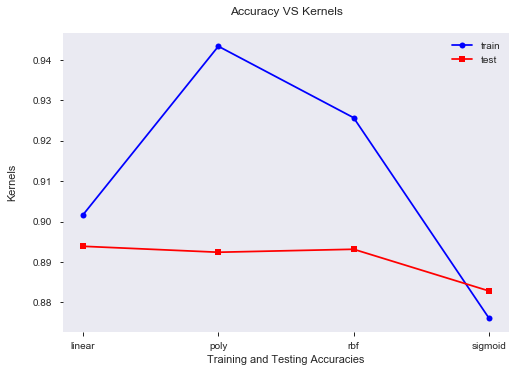

In [172]:
plot_accuracies(kernels, tr_accuracy, te_accuracy, 'Accuracy VS Kernels\n', 'Training and Testing Accuracies\n', 'Kernels\n')

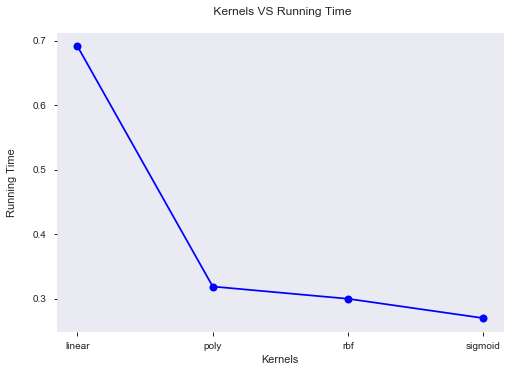

In [173]:
plot_running_time(kernels, running_time, ' Kernels VS Running Time\n', 'Kernels\n', 'Running Time\n')

In [174]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

cv_scores = []

running_time = []

for i in kernels:
    
    start = time.time()
    
    svm_classifier = svm.SVC(kernel = i)
    
    score = cross_val_score(svm_classifier, x_train, y_train, cv = 5)
    
    running_time.append(time.time() - start)
    
    cv_scores.append(score.mean())

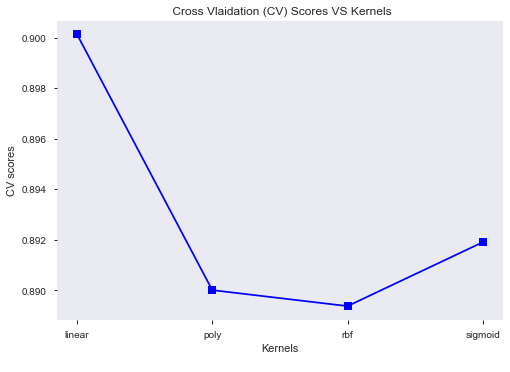

In [180]:
plt.plot(kernels, cv_scores, marker='s', markersize=8,color='blue')

plt.show

plt.title(' Cross Vlaidation (CV) Scores VS Kernels')
    
plt.xlabel('Kernels\n')
    
plt.ylabel('CV scores')
    
plt.grid()

plt.show()

In [181]:
tr_accuracy = []

te_accuracy = []

running_time = []

gamma_values = ['auto', 1, 10, 100]

for i in gamma_values:
    
    start = time.time()
    
    svm_classifier = svm.SVC(kernel = 'poly', gamma = i )
    
    svm_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = svm_classifier.predict(x_train)
    
    y_pred_te = svm_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

In [182]:
print(tr_accuracy)

print(te_accuracy)

[0.9434260429835651, 1.0, 1.0, 1.0]
[0.89240972733972, 0.8481945467943994, 0.8481945467943994, 0.8481945467943994]


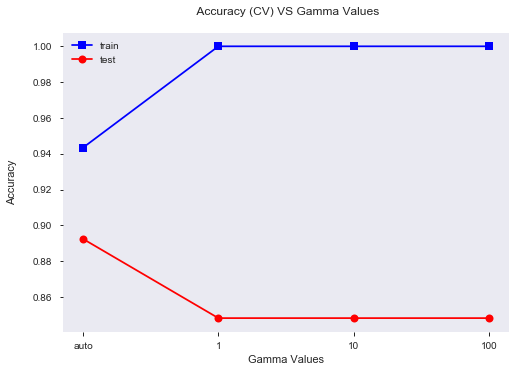

In [183]:
plt.plot(gamma_values, tr_accuracy, marker='s', markersize=8,color='blue', label = 'train')

plt.plot(gamma_values, te_accuracy, marker='o', markersize=8,color='red', label = 'test')

plt.title(' Accuracy (CV) VS Gamma Values\n')
    
plt.xlabel('Gamma Values\n')
    
plt.ylabel('Accuracy\n')
    
plt.grid()

plt.legend()

plt.show()



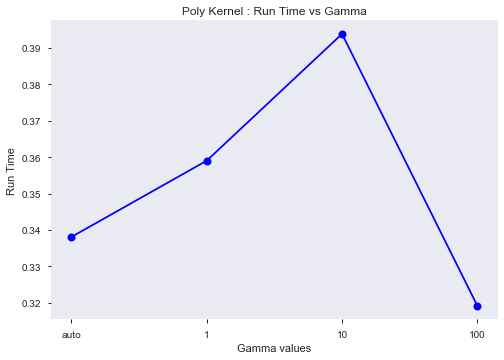

In [184]:
plot_running_time(gamma_values, running_time, 'Poly Kernel : Run Time vs Gamma', 'Gamma values', 'Run Time')

In [185]:
tr_accuracy = []

te_accuracy = []

running_time = []

c_values = list(np.arange(1,100,2))

for i in c_values:
    
    start = time.time()
    
    svm_classifier = svm.SVC(C = i, kernel = 'poly', gamma = 1 )
    
    svm_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = svm_classifier.predict(x_train)
    
    y_pred_te = svm_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

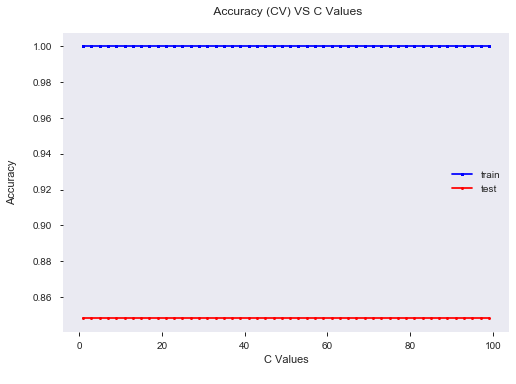

In [186]:
plt.plot(c_values, tr_accuracy, marker='s', markersize=3,color='blue', label = 'train')

plt.plot(c_values, te_accuracy,  marker='o', markersize=3,color='red', label = 'test')

plt.title(' Accuracy (CV) VS C Values\n')
    
plt.xlabel('C Values\n')
    
plt.ylabel('Accuracy\n')
    
plt.grid()

plt.legend()

plt.show()

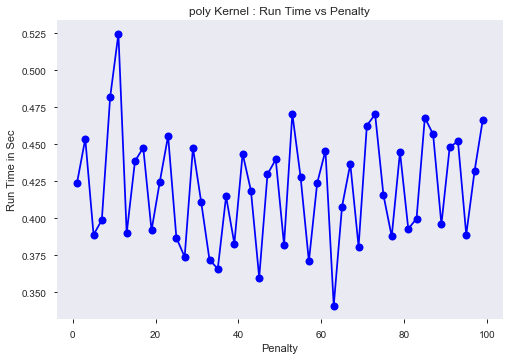

In [187]:
plot_running_time(c_values, running_time, 'poly Kernel : Run Time vs Penalty', 'Penalty', 'Run Time in Sec')

In [188]:
final_svm_model = svm.SVC(C = 1, kernel = 'poly', gamma = 1 )

In [189]:
scores = cross_val_score(final_svm_model, x, y, cv=10, scoring='accuracy')
print(scores.mean())

0.8593193850241262


In [190]:
final_svm_model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [191]:
y_pred_f = final_svm_model.predict(x_test)

In [192]:
print(accuracy_score(y_test, y_pred_f ))

0.8481945467943994


In [193]:
print(confusion_matrix(y_test, y_pred_f))

[[1074  131]
 [  75   77]]


In [194]:
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1205
           1       0.37      0.51      0.43       152

    accuracy                           0.85      1357
   macro avg       0.65      0.70      0.67      1357
weighted avg       0.87      0.85      0.86      1357



### Decision Trees

In [195]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [196]:
dt_y_pred = dt.predict(x_test)

In [197]:
print(accuracy_score(y_test, dt_y_pred ))

0.8680913780397936


In [198]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1205
           1       0.41      0.42      0.42       152

    accuracy                           0.87      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.87      0.87      0.87      1357



In [199]:
print(confusion_matrix(y_test, dt_y_pred))

[[1114   91]
 [  88   64]]


In [200]:
scores = cross_val_score(dt, x_train, y_train,  cv=10)

In [201]:
print(scores.mean())

0.8596530919199928


In [202]:
tr_accuracy = []

te_accuracy = []

running_time = []

maximum_depth = [2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40]

for i in maximum_depth:
    
    start = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = i)
    
    dt_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = dt_classifier.predict(x_train)
    
    y_pred_te = dt_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

In [203]:
def plot_accuracies_dt(inputs, training_accuracy, testing_accuracy, title, xlab, ylab):
    
    plt.plot(inputs,training_accuracy,marker='o',markersize=6,color='blue',label='train')
    
    plt.plot(inputs,testing_accuracy,marker='s',markersize=6,color='red',label='test')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.legend()
    
    plt.grid()
    
    plt.show()

In [204]:
def plot_running_time_dt(inputs, running_time, title, xlab, ylab):
    
    plt.plot(inputs, running_time, marker='o', markersize=8,color='blue')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.grid()
    
    plt.show()

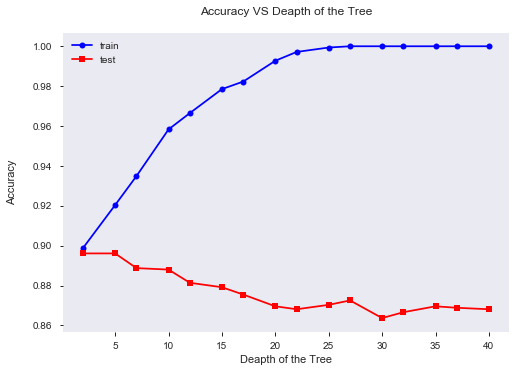

In [205]:
plot_accuracies_dt(maximum_depth, tr_accuracy, te_accuracy, 'Accuracy VS Deapth of the Tree\n', 'Deapth of the Tree\n', 'Accuracy\n' )

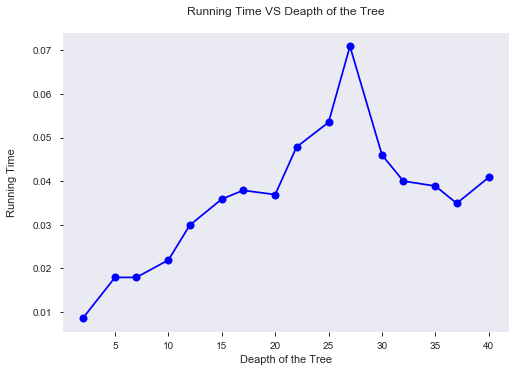

In [206]:
plot_running_time_dt(maximum_depth, running_time, 'Running Time VS Deapth of the Tree\n', 'Deapth of the Tree\n', 'Running Time\n')

In [207]:
tr_accuracy = []

te_accuracy = []

running_time = []

minimum_samples_leaf = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

for i in minimum_samples_leaf:
    
    start = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = i)
    
    dt_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = dt_classifier.predict(x_train)
    
    y_pred_te = dt_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

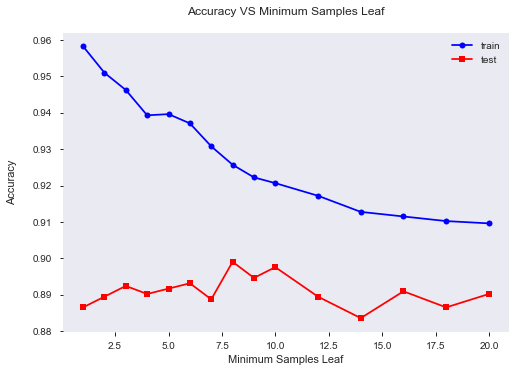

In [208]:
plot_accuracies_dt(minimum_samples_leaf,tr_accuracy, te_accuracy, 'Accuracy VS Minimum Samples Leaf\n', 'Minimum Samples Leaf\n',
                  'Accuracy\n')

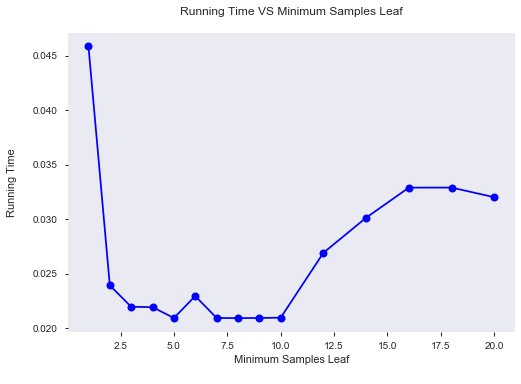

In [209]:
plot_running_time_dt(minimum_samples_leaf, running_time, 'Running Time VS Minimum Samples Leaf\n', 'Minimum Samples Leaf\n', 'Running Time\n')

In [210]:
tr_accuracy = []

te_accuracy = []

running_time = []


minimum_samples_split = [2,4,6,8,10,12,14,16,18,20]

for i in minimum_samples_split:
    
    start = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, min_samples_split = i)
    
    dt_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = dt_classifier.predict(x_train)
    
    y_pred_te = dt_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

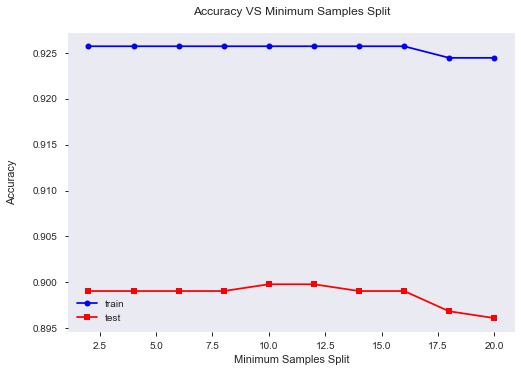

In [211]:
plot_accuracies_dt(minimum_samples_split,tr_accuracy, te_accuracy, 'Accuracy VS Minimum Samples Split\n', 'Minimum Samples Split\n',
                  'Accuracy\n')

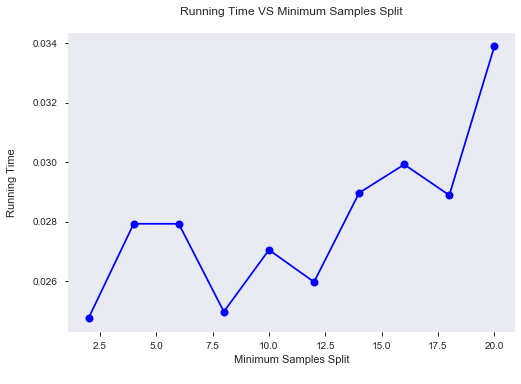

In [212]:
plot_running_time_dt(minimum_samples_split, running_time, 'Running Time VS Minimum Samples Split\n', 'Minimum Samples Split\n', 'Running Time\n')

In [213]:
tr_accuracy = []

te_accuracy = []

running_time = []


criterion_metric = ['gini','entropy']

for i in criterion_metric:
    
    start = time.time()
    
    dt_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 20, min_samples_split = 4, criterion=i)
    
    dt_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = dt_classifier.predict(x_train)
    
    y_pred_te = dt_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

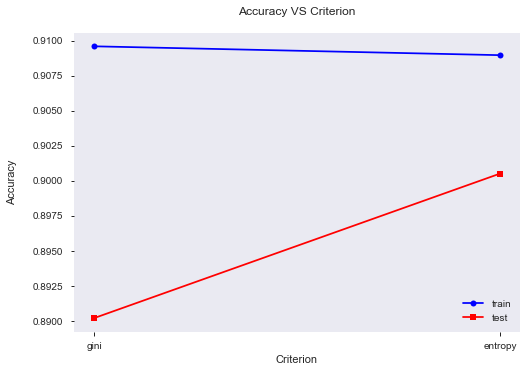

In [214]:
plot_accuracies_dt(criterion_metric,tr_accuracy, te_accuracy, 'Accuracy VS Criterion\n', 'Criterion\n',
                  'Accuracy\n')

In [215]:
final_dt_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, min_samples_split = 4, criterion = 'entropy' )

In [216]:
final_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [217]:
dt_pred = final_dt_classifier.predict(x_test)

In [218]:
print(accuracy_score(y_test, dt_pred))

0.8916728076639646


In [219]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1205
           1       0.53      0.33      0.40       152

    accuracy                           0.89      1357
   macro avg       0.72      0.65      0.67      1357
weighted avg       0.88      0.89      0.88      1357



In [220]:
score = cross_val_score(final_dt_classifier, x_train, y_train, cv = 10)
    
print(score.mean())

0.8884126952435463


### Boosting Models

In [250]:
xgb = XGBClassifier()

In [251]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [252]:
xgb_pred = xgb.predict(x_test)

In [253]:
print(accuracy_score(y_test,xgb_pred))

0.9012527634487841


In [254]:
print(confusion_matrix(y_test,xgb_pred))

[[1159   46]
 [  88   64]]


In [255]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1205
           1       0.58      0.42      0.49       152

    accuracy                           0.90      1357
   macro avg       0.76      0.69      0.72      1357
weighted avg       0.89      0.90      0.89      1357



In [256]:
tr_accuracy = []

te_accuracy = []

running_time = []

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7]

for i in learning_rate:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

In [257]:
def plot_accuracies_xgb(inputs, training_accuracy, testing_accuracy, title, xlab, ylab):
    
    plt.plot(inputs,training_accuracy,marker='o',markersize=6,color='blue',label='train')
    
    plt.plot(inputs,testing_accuracy,marker='s',markersize=6,color='red',label='test')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.legend()
    
    plt.grid()
    
    plt.show()

In [261]:
def plot_running_time_xgb(inputs, running_time, title, xlab, ylab):
    
    plt.plot(inputs, running_time, marker='o', markersize=8,color='blue')
    
    plt.title(title)
    
    plt.xlabel(xlab)
    
    plt.ylabel(ylab)
    
    plt.grid()
    
    plt.show()

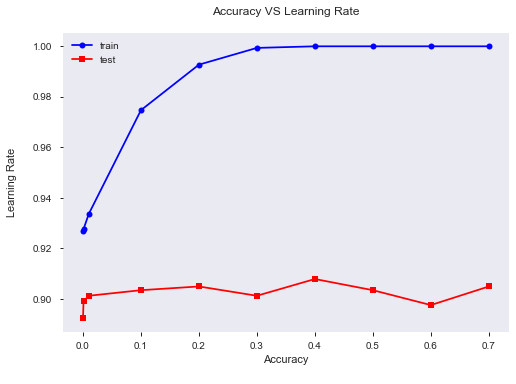

In [262]:
plot_accuracies_xgb(learning_rate, tr_accuracy, te_accuracy, 'Accuracy VS Learning Rate\n', 'Accuracy\n', 'Learning Rate\n' )

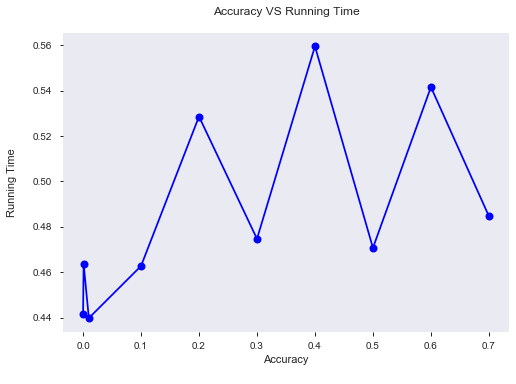

In [263]:
plot_running_time(learning_rate,running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n')

In [264]:
tr_accuracy = []

te_accuracy = []

running_time = []

number_of_estimators = [25,50,75,100,125,150,175,200]

for i in number_of_estimators:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = 0.4, n_estimators = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

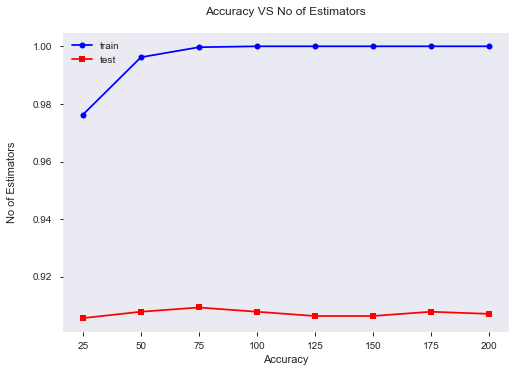

In [265]:
plot_accuracies_xgb(number_of_estimators, tr_accuracy, te_accuracy, 'Accuracy VS No of Estimators\n', 'Accuracy\n', 'No of Estimators\n' )

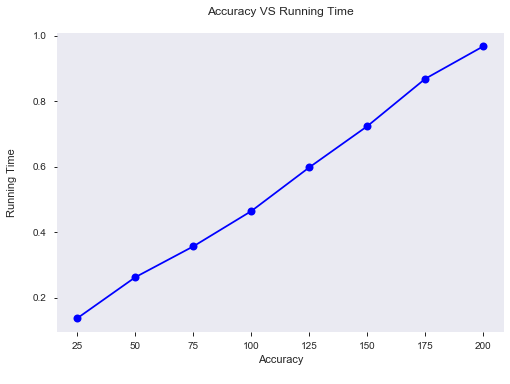

In [266]:
plot_running_time_xgb(number_of_estimators, running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n' )

In [268]:
tr_accuracy = []

te_accuracy = []

running_time = []

maximum_depth = [2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40]

for i in maximum_depth:
    
    start = time.time()
    
    xgb_classifier = XGBClassifier(learning_rate = 0.4, n_estimators = 70, max_depth = i )
    
    xgb_classifier.fit(x_train, y_train)
    
    running_time.append(time.time() - start)
    
    y_pred_tr = xgb_classifier.predict(x_train)
    
    y_pred_te = xgb_classifier.predict(x_test)
        
    tr_accuracy.append(accuracy_score(y_train,y_pred_tr))
        
    te_accuracy.append(accuracy_score(y_test,y_pred_te))

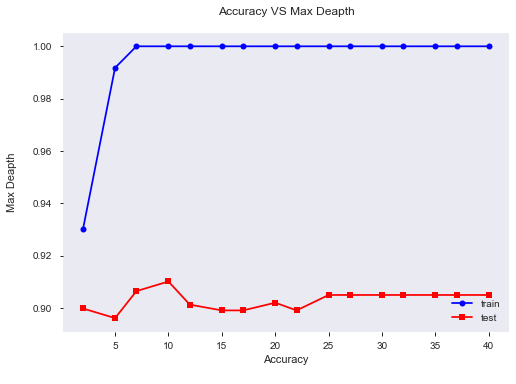

In [269]:
plot_accuracies_xgb(maximum_depth, tr_accuracy, te_accuracy, 'Accuracy VS Max Deapth\n', 'Accuracy\n', 'Max Deapth\n' )

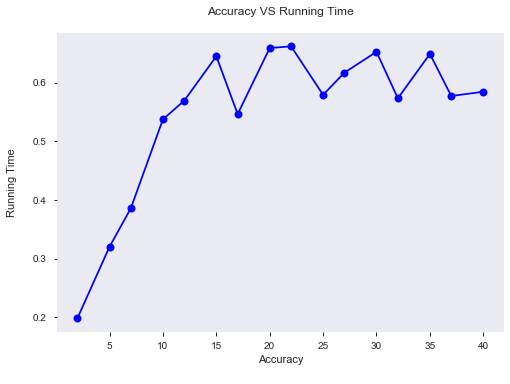

In [270]:
plot_running_time_xgb(maximum_depth, running_time, 'Accuracy VS Running Time\n', 'Accuracy\n', 'Running Time\n' )

In [271]:
final_xgb_classifier = xgb_classifier = XGBClassifier(learning_rate = 0.4, n_estimators = 70, max_depth = 10 )

In [272]:
final_xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.4, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [273]:
xgb_pred = final_xgb_classifier.predict(x_test)

In [274]:
print(accuracy_score(y_test,xgb_pred))

0.9100957995578481


In [275]:
print(confusion_matrix(y_test,xgb_pred))

[[1170   35]
 [  87   65]]


In [276]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1205
           1       0.65      0.43      0.52       152

    accuracy                           0.91      1357
   macro avg       0.79      0.70      0.73      1357
weighted avg       0.90      0.91      0.90      1357



In [277]:
score = cross_val_score(final_xgb_classifier, x_train, y_train, cv = 10)

In [278]:
print(score.mean())

0.8956861975180468
